# Exploratory Data Analysis: Credit Card Customer Churn

**Objective:** The goal of this notebook is to perform a comprehensive Exploratory Data Analysis (EDA) on the Credit Card Customers dataset. We aim to understand the characteristics of customers, identify the factors that correlate with customer churn (Attrition_Flag), and derive actionable insights.

**Methodology:**
1.  **Data Loading & Initial Inspection:** We will start by loading the data and getting a high-level overview of its structure, columns, and data types.
2.  **Data Cleaning & Preprocessing:** We will handle any missing or irrelevant data, and perform necessary transformations to prepare the data for analysis. All transformations will be justified.
3.  **Univariate Analysis:** We will analyze individual features to understand their distributions.
4.  **Bivariate & Multivariate Analysis:** We will explore the relationships between different features, with a special focus on their relationship with the target variable which is Attrition_Flag.
5.  **Answering Key Questions:** We will frame specific questions and use data visualizations to answer them, summarizing the insights found.
6.  **Summary of Findings:** We will conclude with a summary of the key insights discovered during the analysis.

## 1. Setup: Importing Libraries and Loading Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
# Load the dataset
df = pd.read_csv('BankChurners.csv')

## 2. Initial Data Inspection

In [4]:
# Display the first few rows of the dataframe
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Get a concise summary of the dataframe, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
# Get descriptive statistics for numerical columns
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [18]:
df.describe(include=['object'])  # For categorical columns

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


### Initial Observations:
- The dataset contains 10,127 rows and 23 columns.
- There are no immediate signs of missing values (`non-null` counts are consistent).
- The last two columns (`Naive_Bayes_Classifier...`) seem to be model predictions from a previous analysis and are not original features of the customers. These should be removed to avoid data leakage and confusion.

## 3. Data Cleaning and Preprocessing

### 3.1 Dropping Irrelevant Columns

**Justification:** The last two columns are related to a `Naive_Bayes_Classifier`. Including them in our EDA would be misleading as they are not inherent customer attributes but rather model outputs. They do not describe the customer's behavior or profile. Therefore, we will drop them. We also drop `CLIENTNUM` as it's a unique identifier with no analytical value.

In [7]:
cols_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
    'CLIENTNUM' # Client number is just an identifier
]

df_cleaned = df.drop(columns=cols_to_drop)

print("Columns after dropping irrelevant ones:")
print(df_cleaned.columns)

Columns after dropping irrelevant ones:
Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


### 3.2 Checking for Missing Values

**Justification:** Although `.info()` did not show any nulls, it's good practice to explicitly check. Some datasets use placeholders like 'Unknown', 'N/A', or 999 to represent missing data. We will check for these as well.

In [8]:
# Check for standard null values
print("Null values per column:")
print(df_cleaned.isnull().sum())

# Check for non-standard missing values like 'Unknown'
print("\nValue counts for categorical columns to check for 'Unknown':")
for col in ['Education_Level', 'Marital_Status', 'Income_Category']:
    print(f"\n--- {col} ---")
    print(df_cleaned[col].value_counts())

Null values per column:
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Value counts for categorical columns to check for 'Unknown':

--- Education_Level ---
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

--- Marital_Status ---
Marital_Status
Married     4687
Single      3943
Unknown

**Observation:** Several categorical columns contain `'Unknown'` values. For this EDA, we will treat 'Unknown' as a separate category rather than imputing it. This allows us to see if the 'Unknown' group behaves differently, which could be an insight in itself (e.g., maybe the bank needs to improve its data collection for this group).


## 4. Exploratory Data Analysis (EDA)

### Question 1: What is the overall customer churn rate?

First, let's understand our target variable, `Attrition_Flag`. This column indicates whether a customer is still active ('Existing Customer') or has churned ('Attrited Customer').

In [20]:
# Calculate churn rate
churn_counts = df_cleaned['Attrition_Flag'].value_counts()
churn_rate = df_cleaned['Attrition_Flag'].value_counts(normalize=True) * 100

print("Customer Status Counts:")
print(churn_counts)
print("\nCustomer Status Percentage:")
print(churn_rate)

# Visualize with a Plotly Pie Chart for interactivity
fig = px.pie(names=churn_rate.index, values=churn_rate.values, 
             title='Customer Attrition (Churn) Rate')
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])
fig.show()


Customer Status Counts:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Customer Status Percentage:
Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64


**Answer:** The dataset is imbalanced. Approximately **16.1%** of customers have attrited (churned), while **83.9%** are still existing customers. This is important to keep in mind for any future modeling tasks.

### Question 2: What is the demographic distribution of the customers?

Let's explore key demographic features: Gender, Age, Marital Status, and Education Level.

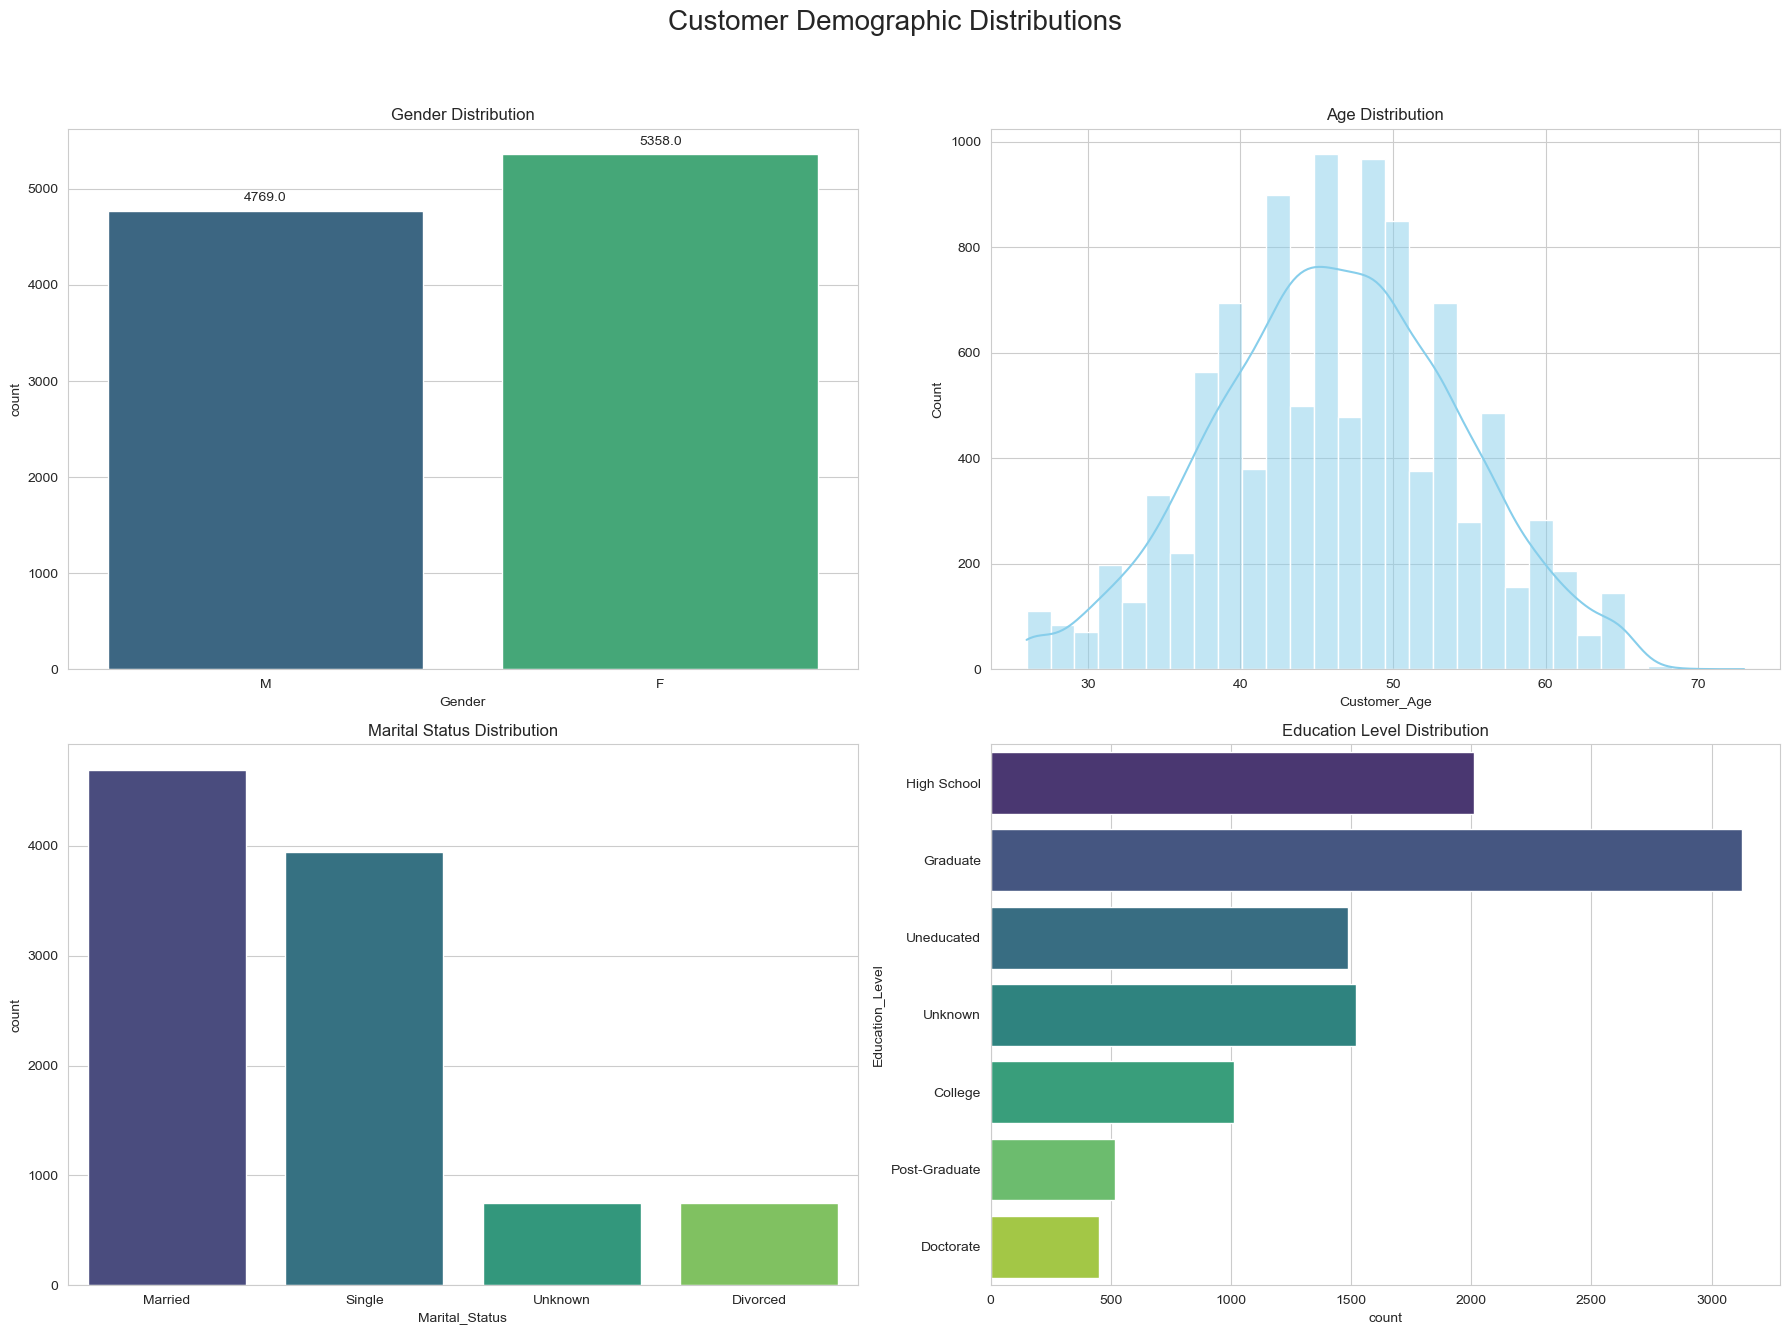

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Customer Demographic Distributions', fontsize=20)

# Gender Distribution
sns.countplot(ax=axes[0, 0], x='Gender', data=df_cleaned, palette='viridis')
axes[0, 0].set_title('Gender Distribution')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Age Distribution
sns.histplot(ax=axes[0, 1], data=df_cleaned, x='Customer_Age', bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Age Distribution')

# Marital Status Distribution
sns.countplot(ax=axes[1, 0], x='Marital_Status', data=df_cleaned, palette='viridis')
axes[1, 0].set_title('Marital Status Distribution')

# Education Level Distribution
sns.countplot(ax=axes[1, 1], y='Education_Level', data=df_cleaned, palette='viridis') # Using y for better readability
axes[1, 1].set_title('Education Level Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Answer:**
- **Gender:** There are slightly more female customers than male customers.
- **Age:** The customer age distribution is roughly normal, centered around the mid-40s.
- **Marital Status:** The majority of customers are either 'Married' or 'Single'.
- **Education:** 'Graduate' is the most common education level, followed by 'High School' and 'Unknown'.

### Question 3: How does churn vary across different demographic groups?

Now we look at the relationship between demographics and the `Attrition_Flag`.

In [11]:
# Using Plotly for interactive categorical plots
demographic_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category']

for col in demographic_cols:
    fig = px.histogram(df_cleaned, x=col, color='Attrition_Flag', 
                       barmode='group', 
                       title=f'Attrition Count by {col}',
                       color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.show()

**Answer:**
- **Gender:** Females have a slightly higher churn rate compared to males.
- **Education Level:** Customers with 'Doctorate' and 'Post-Graduate' degrees appear to have a proportionally higher churn rate within their smaller groups.
- **Marital Status:** 'Single' customers show a noticeable churn rate.
- **Income Category:** Customers in lower income brackets (especially 'Less than $40K') and the '$40K - $60K' bracket seem to have higher churn counts. The 'Unknown' income category also has a significant number of attrited customers.

### Question 4: How do financial attributes differ between existing and attrited customers?

Let's analyze key financial metrics and customer relationship attributes like `Credit_Limit`, `Total_Revolving_Bal`, `Total_Trans_Amt`, and our new `Avg_Utilization_Ratio`.

In [12]:
financial_cols = ['Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio', 'Contacts_Count_12_mon']

# Melt the dataframe to make it suitable for faceting with Plotly Express
df_melted = df_cleaned.melt(id_vars='Attrition_Flag', value_vars=financial_cols, 
                            var_name='Financial_Metric', value_name='Value')

# Create faceted box plots using Plotly Express
fig = px.box(df_melted, x='Attrition_Flag', y='Value', 
             color='Attrition_Flag', 
             facet_row='Financial_Metric', 
             title='Financial & Engagement Metrics vs. Attrition',
             labels={'Value': 'Metric Value', 'Attrition_Flag': 'Customer Status'},
             color_discrete_map={'Existing Customer': 'blue', 'Attrited Customer': 'red'})

# Update layout for better readability
fig.update_layout(height=1600, width=900, showlegend=True)
fig.update_yaxes(matches=None) # Allow y-axes to have independent scales
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1])) # Clean up subplot titles
fig.show()

**Answer:**
- **Credit Limit & Total Revolving Balance:** The distributions are quite similar, but attrited customers seem to have a slightly lower median for both.
- **Total Transaction Amount (Last 12 Months):** This is a key differentiator. **Attrited customers have a significantly lower median transaction amount**. This suggests that customers who stop using their card frequently are at high risk of churning.
- **Average Utilization Ratio:** Attrited customers have a much lower utilization ratio. In fact, the median is close to zero, indicating they have stopped using their revolving credit entirely.
- **Contacts Count (Last 12 Months):** **Attrited customers have a higher median number of contacts with the bank**. This could mean that dissatisfied customers contact the bank more often before they decide to leave.

### Question 5: Is there a correlation between the numerical features?

A correlation heatmap will help us understand the linear relationships between numerical variables.

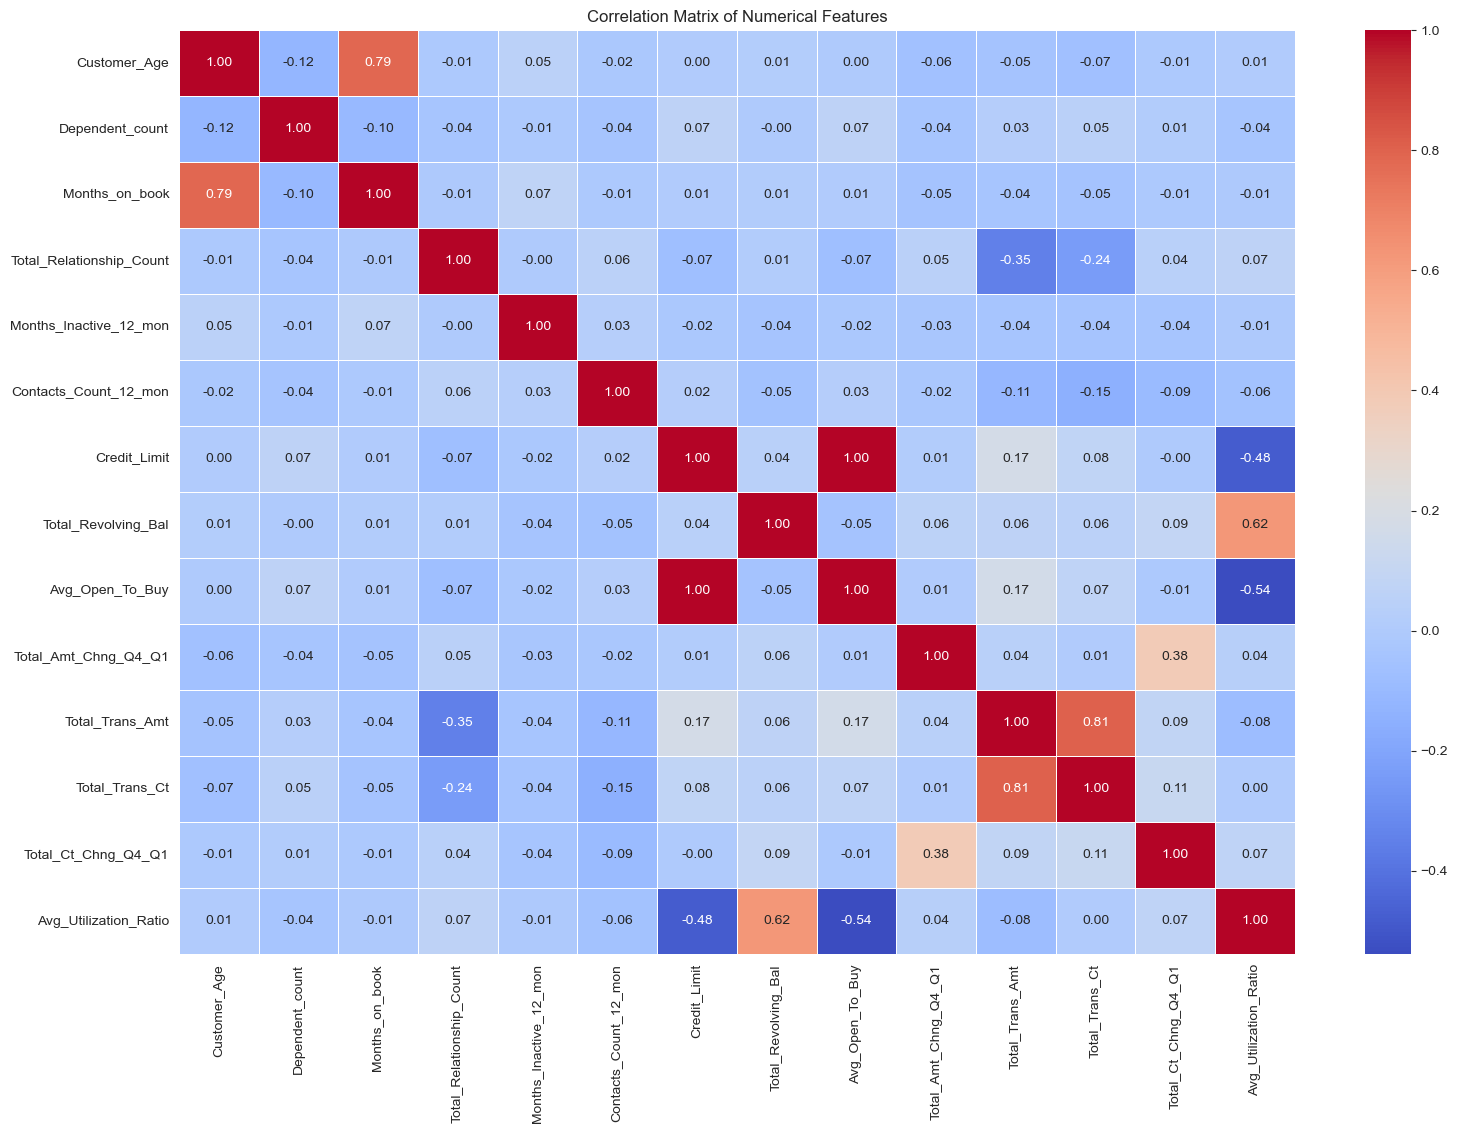

In [13]:
# Select only numerical columns for the correlation matrix
numerical_df = df_cleaned.select_dtypes(include=np.number)

plt.figure(figsize=(18, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Answer:**
- **Strong Positive Correlations:**
  - `Months_on_book` and `Customer_Age` (0.79): This is expected, as older people have likely been customers for longer.
  - `Total_Trans_Amt` and `Total_Trans_Ct` (0.81): Also logical; customers who make more transactions accumulate a higher total transaction amount.
  - `Avg_Open_To_Buy` and `Credit_Limit` (1.00): This is a perfect correlation because one is derived from the other (`Avg_Open_To_Buy = Credit_Limit - Total_Revolving_Bal`).
- **Moderate Positive Correlation:**
  - `Total_Revolving_Bal` and `Avg_Utilization_Ratio` (0.62): As revolving balance increases, so does the utilization ratio, which is expected.

There are no strong negative correlations that stand out.

### Question 6: What is the relationship between Card Category and Churn?

Let's investigate if the type of card a customer holds (`Blue`, `Silver`, `Gold`, `Platinum`) has any bearing on their likelihood to churn.

In [14]:
fig = px.histogram(df_cleaned, x='Card_Category', color='Attrition_Flag',
                   barmode='group',
                   title='Churn Distribution by Card Category',
                   color_discrete_sequence=px.colors.qualitative.Safe)
fig.show()

**Answer:**
The vast majority of customers, both existing and attrited, are in the 'Blue' card category. While the raw number of attrited customers is highest for 'Blue' cards (due to the sheer volume), the other categories (`Silver`, `Gold`, `Platinum`) have very few churners. This suggests that customers with premium cards might be more loyal or receive benefits that lead to higher retention. The bank's retention efforts seem to be most needed for the largest segment, the 'Blue' card holders.

### Question 7: How does customer inactivity relate to churn?

The `Months_Inactive_12_mon` feature tells us how many of the last 12 months a customer has been inactive. This could be a strong predictor of churn.

In [15]:
fig = px.histogram(df_cleaned, x='Months_Inactive_12_mon', color='Attrition_Flag',
                   barmode='group',
                   title='Churn by Months Inactive in the Last Year',
                   labels={'Months_Inactive_12_mon': 'Number of Inactive Months'},
                   color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

**Answer:**
There is a clear trend here. While existing customers are most commonly inactive for 2-3 months, the number of attrited customers rises as inactivity increases. Customers who have been inactive for 4, 5, or 6 months show a much higher proportion of churn compared to those with lower inactivity periods. This confirms that **prolonged inactivity is a major red flag for potential churn**.

## 5. Summary of Key Insights & Profile of an Attrited Customer

Based on our analysis, we can build a profile of a customer who is more likely to churn:

1.  **Low Engagement & Inactivity:** This is the most significant factor. Customers who are likely to churn show a sharp decline in their card usage:
    -   **Lower `Total_Trans_Amt` and `Total_Trans_Ct`** over the last 12 months.
    -   **Very low `Avg_Utilization_Ratio` and `Total_Revolving_Bal`**, often near zero. This indicates they've stopped carrying a balance.
    -   **Higher `Months_Inactive_12_mon`**, with risk increasing significantly after 3 months of inactivity.

2.  **High Contact Rate:** They tend to contact the bank more frequently (`Contacts_Count_12_mon` is higher). This could be a sign of unresolved issues or dissatisfaction leading up to their departure.

3.  **Card Category:** The majority of churn happens within the standard **'Blue' card** category, which is also the largest customer segment.

4.  **Demographic Indicators:** While less strong than behavioral metrics, some demographic trends exist:
    -   The churn rate is slightly higher among **females**.
    -   Customers in **lower-income brackets** seem more prone to churn.

### Actionable Recommendations for the Bank:
- **Proactive Engagement Campaigns:** The bank could create a monitoring system to flag customers whose transaction frequency drops or who have been inactive for 2-3 consecutive months. These customers could be targeted with special offers or loyalty rewards to encourage re-engagement.

- **Analyze Customer Complaints:** Since a high number of contacts correlates with churn, the bank should analyze the reasons for these contacts. Improving customer service and resolving issues more effectively could be crucial for retention.

- **Segment-Specific Strategies:** Retention efforts should be focused heavily on the 'Blue' card segment. For customers with low utilization, the bank could offer products better suited to their needs, such as cards with different reward structures or lower fees.